<a href="https://colab.research.google.com/github/murillodomingos/Brain-Tumor/blob/main/TrabalhoRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

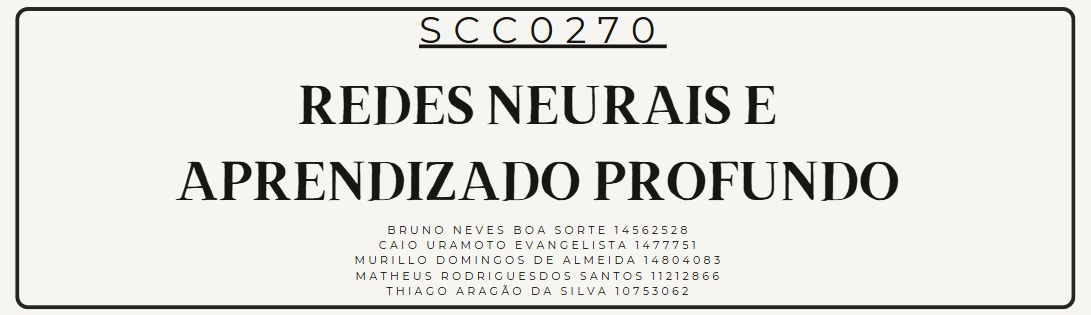

## Introdução

---

###🧠 Projeto Multimodal de Redes Neurais para Detecção e Análise de Tumores Cerebrais (CT + MRI)

---

## 📌 Descrição Geral

Este projeto tem como objetivo o desenvolvimento de um modelo de **aprendizado profundo multimodal**, utilizando imagens de **Tomografia Computadorizada (CT)** e **Ressonância Magnética (MRI)** para **detecção, classificação e análise de tumores cerebrais**.

O uso de múltiplas modalidades de imagem permite ao modelo combinar informações complementares:

* **CT:** Estruturas ósseas e calcificações.
* **MRI:** Detalhes de tecidos moles.

Essa abordagem busca auxiliar no **diagnóstico precoce**, na **classificação de tipos de tumores** e como suporte a decisões clínicas.

---

## 📂 Sobre o Conjunto de Dados

O dataset foi construído a partir de diferentes fontes públicas e privadas.

* **Modalidades:** CT e MRI.
* **Tipos de Tumores:** Glioma, Meningioma, Pituitário, entre outros.
* **Tamanhos das Imagens:** Diversos (256x256, 512x512).
* **Anotações:** Tipo de tumor, localização (em alguns casos), modalidade da imagem.

---

## 🔗 Fontes do Conjunto de Dados

### 📍 Imagens de Tomografia Computadorizada (CT):

* [CT Brain Segmentation - Roboflow](https://universe.roboflow.com/joshua-zgc7b/ct-brain-segmentation)
* [CT to MRI cGAN - Kaggle](https://www.kaggle.com/datasets/darren2020/ct-to-mri-cgan)
* [CT Head Scans - Kaggle](https://www.kaggle.com/datasets/clarksaben/ct-head-scans)
* [Head CT Images for Classification - Kaggle](https://www.kaggle.com/datasets/nipaanjum/head-ct-images-for-classification)
* Dados privados (Cérebro Anônimo)
* [CT e MRI não pareados - Mendeley Data](https://data.mendeley.com/datasets/z4wc364g79/1)

### 📍 Imagens de Ressonância Magnética (MRI):

* [Brain Tumor MRI Scans - Kaggle](https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans)
* [Brain Tumor MRIs - Kaggle](https://www.kaggle.com/datasets/vinayjayanti/brain-tumor-mris)
* [Siardataset - Kaggle](https://www.kaggle.com/datasets/masoumehsiar/siardataset)
* [Brain Tumors 256x256 - Kaggle](https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256)
* [MRI Image Classification - Kaggle](https://www.kaggle.com/datasets/iashiqul/brain-tumor-mri-image-classification-dataset)
* [Brain Tumor MRI Yes or No - Kaggle](https://www.kaggle.com/datasets/mohamada2274/brain-tumor-mri-yes-or-no)
* [Brain Tumor Class Class - Roboflow](https://universe.roboflow.com/college-sf5ih/brain-tumor-class-class)
* [Brain Tumor Detection - Roboflow](https://universe.roboflow.com/tuan-nur-afrina-zahira/brain-tumor-detection-bmmqz)
* [Tumor Detection - Roboflow](https://universe.roboflow.com/brain-tumor-detection-wsera/tumor-detection-ko5jp)

---

## 🎯 Objetivos do Projeto

* Classificação de Tumores
* Segmentação de Áreas Tumorais
* Detecção Binária (Tumor / Sem Tumor)
* Fusão de Modalidades (CT + MRI)
* Tradução entre Modalidades (ex.: geração de MRI a partir de CT)

---

## 🧑‍⚕️ Importância Clínica e Científica

* Diagnóstico precoce
* Apoio à decisão clínica
* Pesquisa em fusão multimodal de imagens médicas
* Desenvolvimento de sistemas CAD (Computer-Aided Diagnosis)

---

## 🛠️ Modelos Sugeridos

### Classificação

* CNNs (ResNet, VGG, EfficientNet)
* Vision Transformers (ViT)
* Modelos multimodais com Early e Late Fusion

### Segmentação

* U-Net, U-Net++
* 3D U-Net
* SegNet
* Mask R-CNN para imagens médicas

### Tradução entre Modalidades / Geração de Imagens

* CycleGAN
* pix2pix GAN

---

## 🔗 Estratégias de Fusão Multimodal

| Estratégia      | Descrição                                             |
| --------------- | ----------------------------------------------------- |
| Early Fusion    | CT e MRI como múltiplos canais na entrada             |
| Late Fusion     | Processamento separado + fusão posterior das features |
| Cross-Attention | Mecanismo de atenção cruzada entre as features        |

---

## 📊 Métricas de Avaliação

### Para Classificação:

* Accuracy
* Precision / Recall / F1-score
* AUC-ROC

### Para Segmentação:

* Dice Coefficient
* IoU (Intersection over Union)
* Hausdorff Distance

---

## ✅ Aplicações Futuras

* Ferramentas clínicas com IA
* Suporte à radiologia e neurocirurgia
* Pesquisa em aprendizado multimodal
* Sistemas hospitalares de diagnóstico

---

## 📚 Referências Científicas

* Isensee, F. et al. (2021). nnU-Net: A self-configuring method for deep learning-based biomedical image segmentation. *Nature Methods*.
* Zhou, Z. et al. (2018). UNet++: A Nested U-Net Architecture for Medical Image Segmentation. *Springer*.
* Zhou, T., Ruan, S., Canu, S. (2019). Deep Learning for Medical Image Segmentation Using Multi-Modality Fusion. *Array*.
* Ronneberger, O. et al. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation. *MICCAI*.

---


##EDA

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("murtozalikhon/brain-tumor-multimodal-image-ct-and-mri")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-multimodal-image-ct-and-mri


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
#Device agnostic code
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

#Resizing images and turning them into tensors for matrix operations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

#Creating Dataloaders for Magnetic Resonance Imaging
MRI = datasets.ImageFolder(root=path + '/Dataset/Brain Tumor MRI images', transform=transform)

MRI_dataloader = DataLoader(MRI, batch_size=32, shuffle=True)
MRI_train_size = int(0.8 * len(MRI))
MRI_test_size = len(MRI) - MRI_train_size

MRI_train_dataset, MRI_test_dataset = random_split(MRI, [MRI_train_size, MRI_test_size])

MRI_train_loader = DataLoader(MRI_train_dataset, batch_size=32, shuffle=True)
MRI_test_loader = DataLoader(MRI_test_dataset, batch_size=32, shuffle=True)

print("MRI Training set size:", len(MRI_train_dataset))
print("MRI Testing set size:", len(MRI_test_dataset))

MRI Training set size: 4000
MRI Testing set size: 1000


In [ ]:
print("MRI Classes:", MRI.classes)

MRI Classes: ['Healthy', 'Tumor']


In [ ]:
class MRIModel(nn.Module):
  def __init__(self, num_classes_multi=4):
    super(MRIModel, self).__init__()

    #Enco

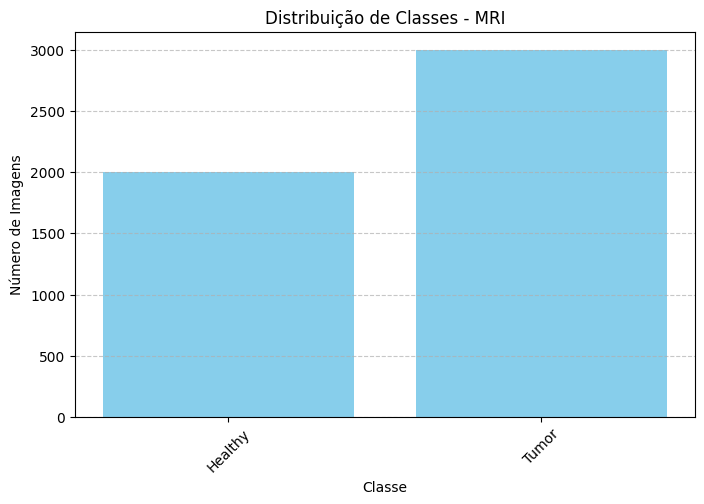

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Contagem de imagens por classe
labels = [sample[1] for sample in MRI.samples]
class_counts = Counter(labels)

# Mapeando índices para nomes das classes
class_names = MRI.classes
class_counts_named = {class_names[idx]: count for idx, count in class_counts.items()}

# Plot
plt.figure(figsize=(8,5))
plt.bar(class_counts_named.keys(), class_counts_named.values(), color='skyblue')
plt.title('Distribuição de Classes - MRI')
plt.xlabel('Classe')
plt.ylabel('Número de Imagens')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


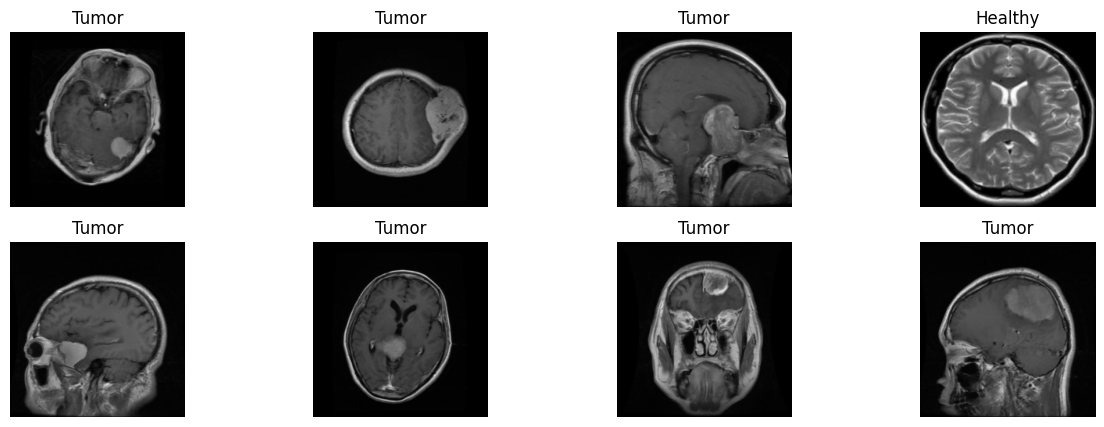

In [ ]:

def show_random_images(dataset, class_names, num_images=8):
    plt.figure(figsize=(15, 5))
    indices = np.random.choice(len(dataset), num_images, replace=False)

    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        image = image.permute(1, 2, 0)  # De Tensor [C, H, W] para [H, W, C]

        plt.subplot(2, num_images//2, i+1)
        plt.imshow(image, cmap='gray')  # Para MRI geralmente é escala de cinza
        plt.title(class_names[label])
        plt.axis('off')

show_random_images(MRI, MRI.classes, num_images=8)


In [ ]:
# Caminho de exemplo de uma imagem bruta (pegar a primeira imagem de cada classe)
for class_folder in MRI.classes:
    class_path = os.path.join(path, 'Dataset/Brain Tumor MRI images', class_folder)
    example_image_path = os.listdir(class_path)[0]
    img = Image.open(os.path.join(class_path, example_image_path))
    print(f"Classe: {class_folder}, Tamanho original: {img.size}")


Classe: Healthy, Tamanho original: (256, 256)
Classe: Tumor, Tamanho original: (224, 224)


In [ ]:
##Estatísticas Básicas dos Pixels (Após Transform)
## Por exemplo, verificar média e desvio padrão de pixels, útil para normalização.

def get_dataset_stats(dataset):
    loader = DataLoader(dataset, batch_size=32, shuffle=False)
    mean = 0.0
    std = 0.0
    total_images = 0

    for images, _ in loader:
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)  # [batch, channels, pixels]
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images += batch_samples

    mean /= total_images
    std /= total_images
    return mean, std

mean, std = get_dataset_stats(MRI_train_dataset)
print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: tensor([0.1901, 0.1901, 0.1901])
Std: tensor([0.1824, 0.1824, 0.1824])


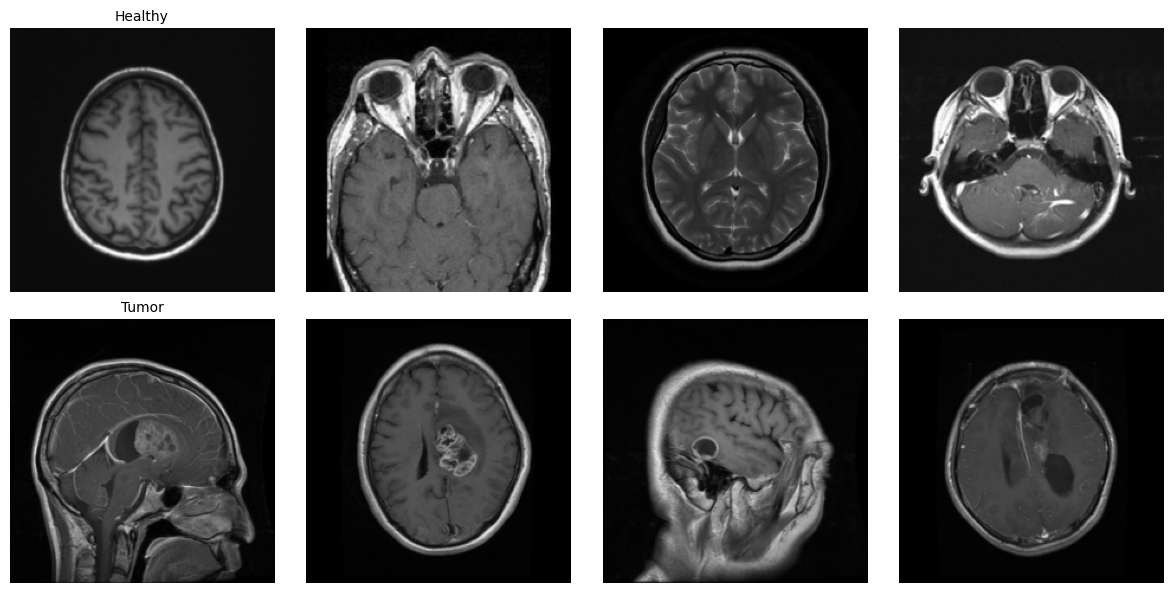

In [ ]:
def show_images_per_class(dataset, class_names, samples_per_class=4):
    fig, axes = plt.subplots(len(class_names), samples_per_class, figsize=(samples_per_class*3, len(class_names)*3))

    for class_idx, class_name in enumerate(class_names):
        images_shown = 0
        for image, label in dataset:
            if label == class_idx:
                ax = axes[class_idx, images_shown]
                ax.imshow(image.permute(1, 2, 0), cmap='gray')
                ax.axis('off')
                if images_shown == 0:
                    ax.set_title(f'{class_name}', fontsize=10)
                images_shown += 1
                if images_shown == samples_per_class:
                    break
    plt.tight_layout()
    plt.show()

show_images_per_class(MRI, MRI.classes, samples_per_class=4)
